In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from oracle import make_oracle
from utils import plot_weights, plot_lr, plot_convergence

In [18]:
with open("optimize_data/a1a_lr_log.pkl", "rb") as log:
    log = pickle.load(log)

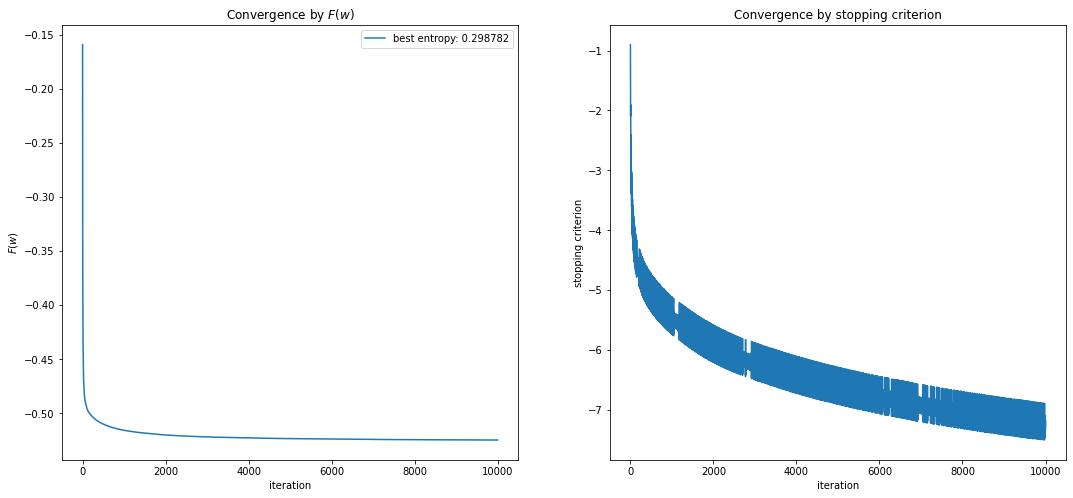

In [19]:
plot_convergence(log)

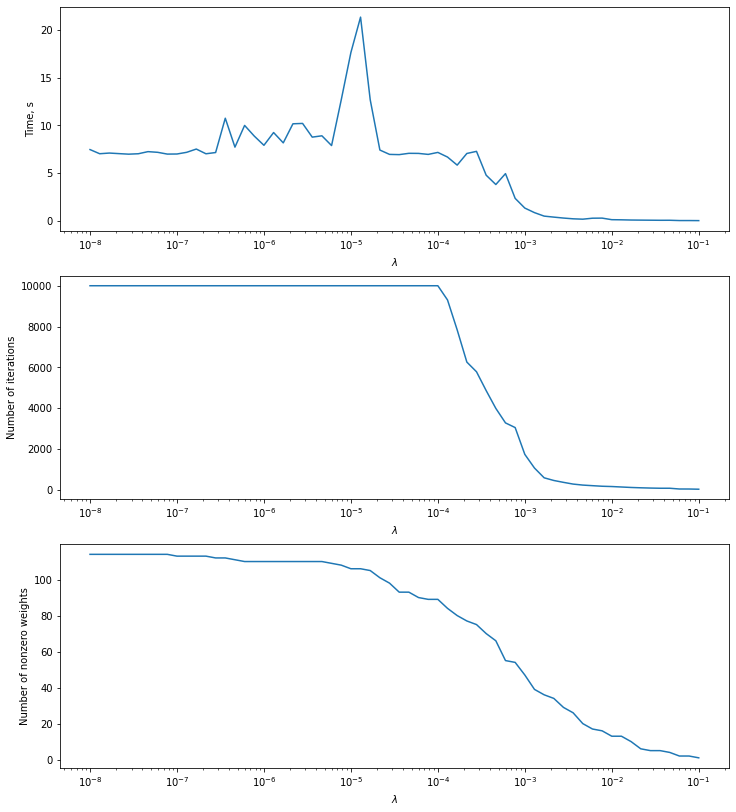

In [20]:
plot_lr(log)

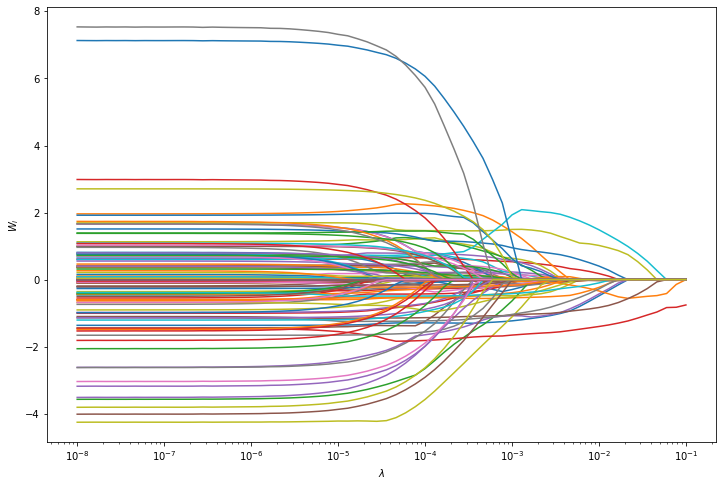

In [21]:
plot_weights(log)